In [78]:
# intalando paquetes 
# %pip install pandas
# %pip install seaborn


In [79]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Cargamos los datos

In [80]:
db = pd.read_csv("pima-indians-diabetes.csv", low_memory=False)

# 1. Inspección Inicial de los datos
Revisamos las primeras filas

In [81]:
db.head(10)

,6,148,72,35,0,33.6,0.627,50,s
0,1,85,66,29,0,26.6,0.351,1,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


Podemos observar que no se dispone de un nombre de columna para facilitar el tratamiento del dataset por ello utilizaremos los siguientes atributos brindados en la información para colocar un nombre a nuestras columnas, tampoco podemos establecer el header en la fila 0

1. Number of times pregnant
2. Plasma Glucose concentration a 2 hours in an oral Glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable 

Usamos el prámetro 'names' para agregar el nombre de colummnas

In [82]:
column_names =[ 'Pregnancies','Glucose','BloodPressure','thickness','insulin','mass','pedigree','age','clase']
db = pd.read_csv("pima-indians-diabetes.csv", names = column_names, low_memory=False)


También podemos hacerlo de la siguiente forma

In [83]:
db.columns = [ 'Pregnancies','Glucose','BloodPressure','thickness','insulin','mass','pedigree','age','clase']

Ahora comprobamos que ya lo tenemos mas organizados

In [84]:
db.head(10)

,Pregnancies,Glucose,BloodPressure,thickness,insulin,mass,pedigree,age,clase
0,6,148,72,35,0,33.6,0.627,50,s
1,1,85,66,29,0,26.6,0.351,1,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Comprobamos la dimensión del Dataframe

In [85]:
db.shape

(768, 9)

Comprobamos la información del Dataframe

In [99]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   thickness      768 non-null    int64  
 4   insulin        768 non-null    int64  
 5   mass           768 non-null    float64
 6   pedigree       768 non-null    float64
 7   age            768 non-null    int64  
 8   clase          768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


# 3. Limpieza de los datos
Comprobamos valores faltantes, también podemos graficar para obtener una solución mas visual


In [87]:
db.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
thickness        0
insulin          0
mass             0
pedigree         0
age              0
clase            0
dtype: int64

Al parecer se trata de un dataframe limpio, ya que no cuenta con valores faltantes, ni ambiguedad en el tipo de dato de las columnas, pero en caso de que quisieramos eliminar una fila con un dato faltante:

In [88]:
db = db.dropna(subset=['clase'])

# 4. Análisis univariado

In [89]:
db.describe()

,Pregnancies,Glucose,BloodPressure,thickness,insulin,mass,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.201823
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.817369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,1.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


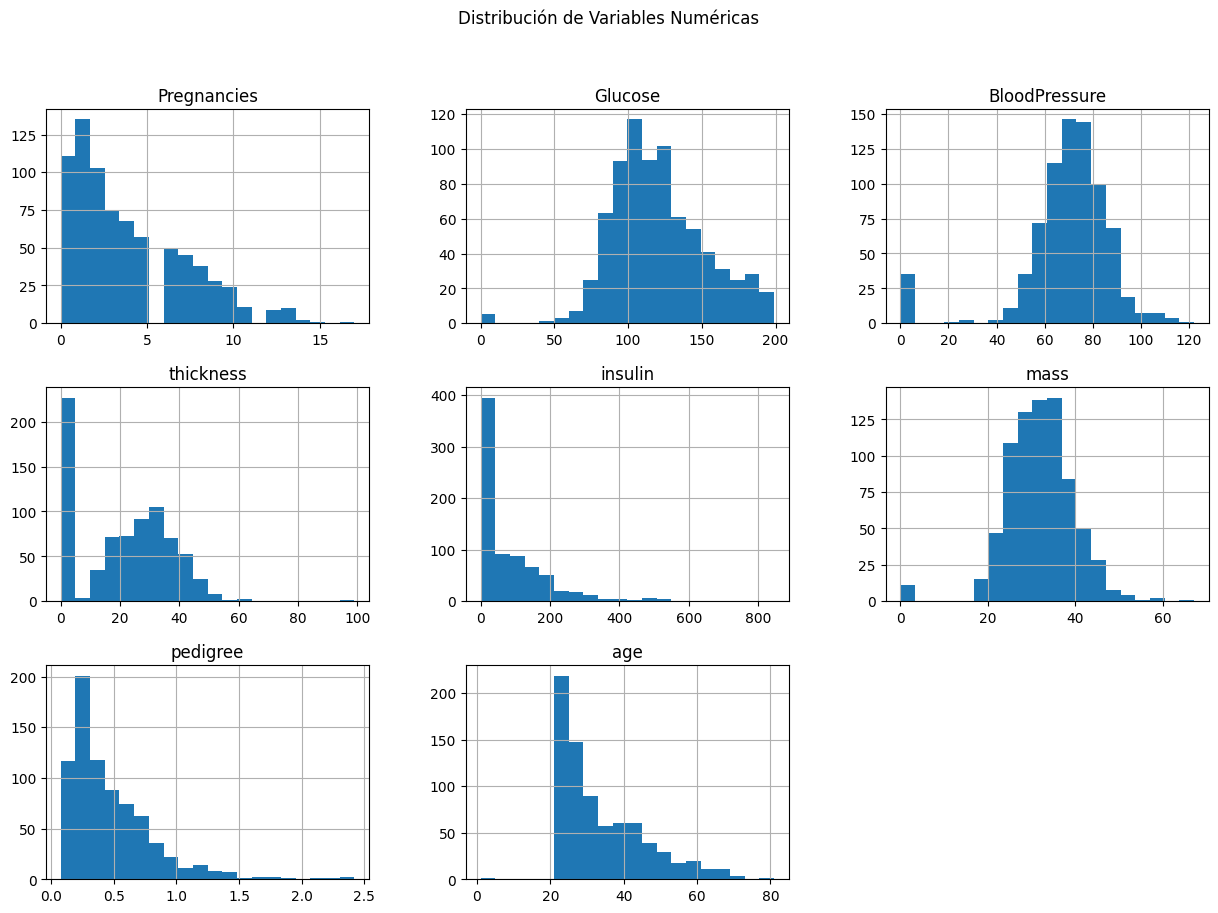

In [90]:
db.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

También podemos filtrar los datos, en este caso filtramos los que tienen presión 0, ya que estos estarián muertos

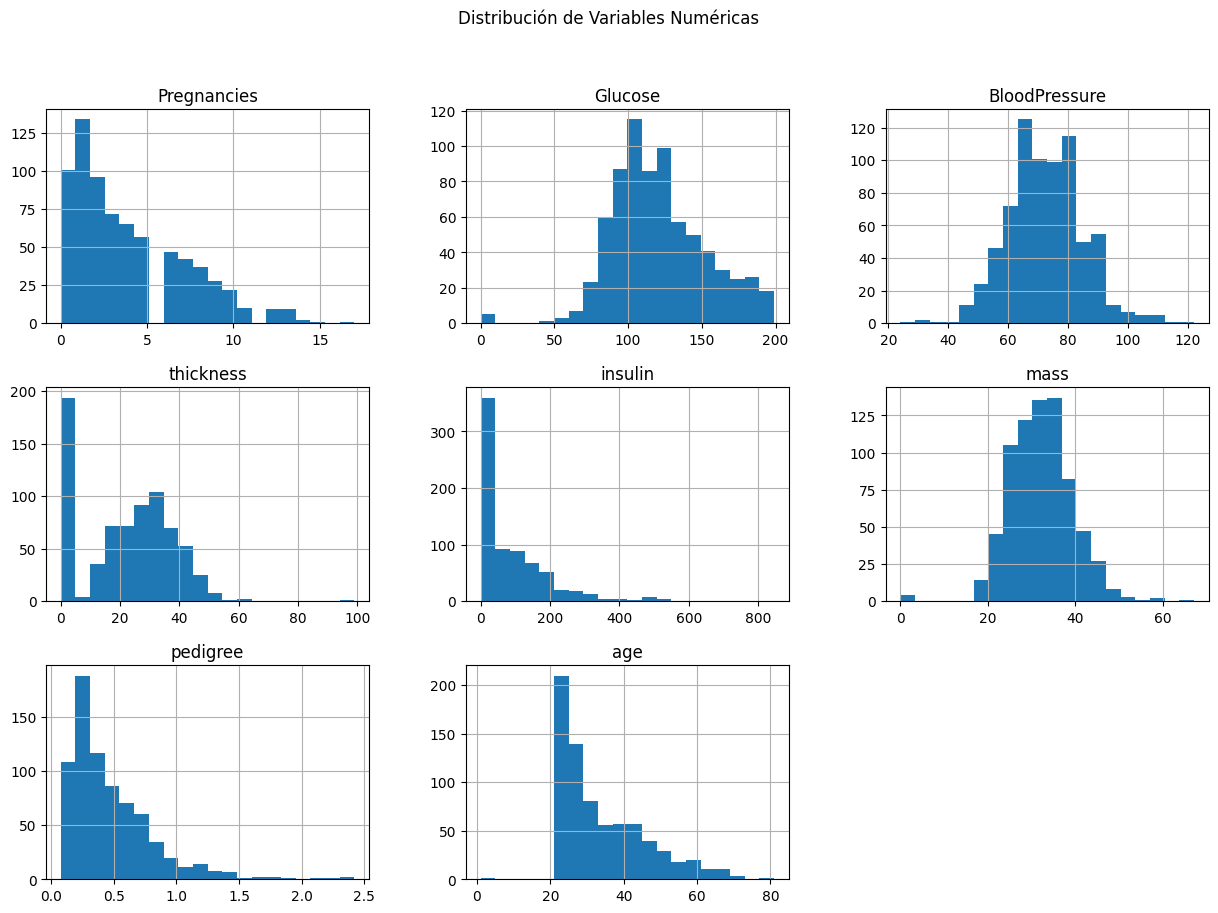

In [91]:
df_filtrada = db[db['BloodPressure'] != 0]
df_filtrada.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

En el caso de la distribución de clase donde 1 es positivo para diabetes y 0 para negativo, graficamos de forma particular a continuación

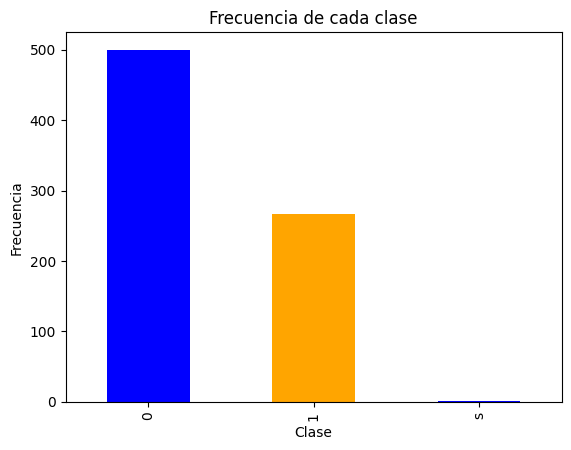

In [92]:
counts = db['clase'].value_counts()
counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cada clase')
plt.show()

Una mejor manera de visualizar los datos sería en un tipo de gráfico circular o también llamado de pastel. Al observar notamos que el 34,9% obtuvo un análisis positivo

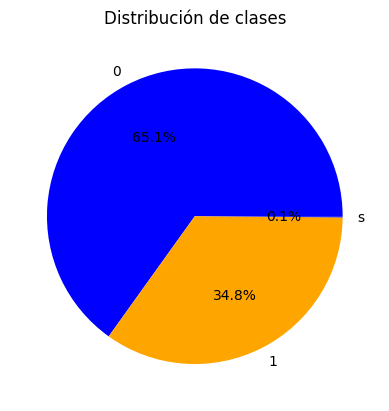

In [93]:
counts = db['clase'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Distribución de clases')
plt.show()

Usando Boxplots relacionamos la variables con la variable de clase, incluso podemos observar valores outliers

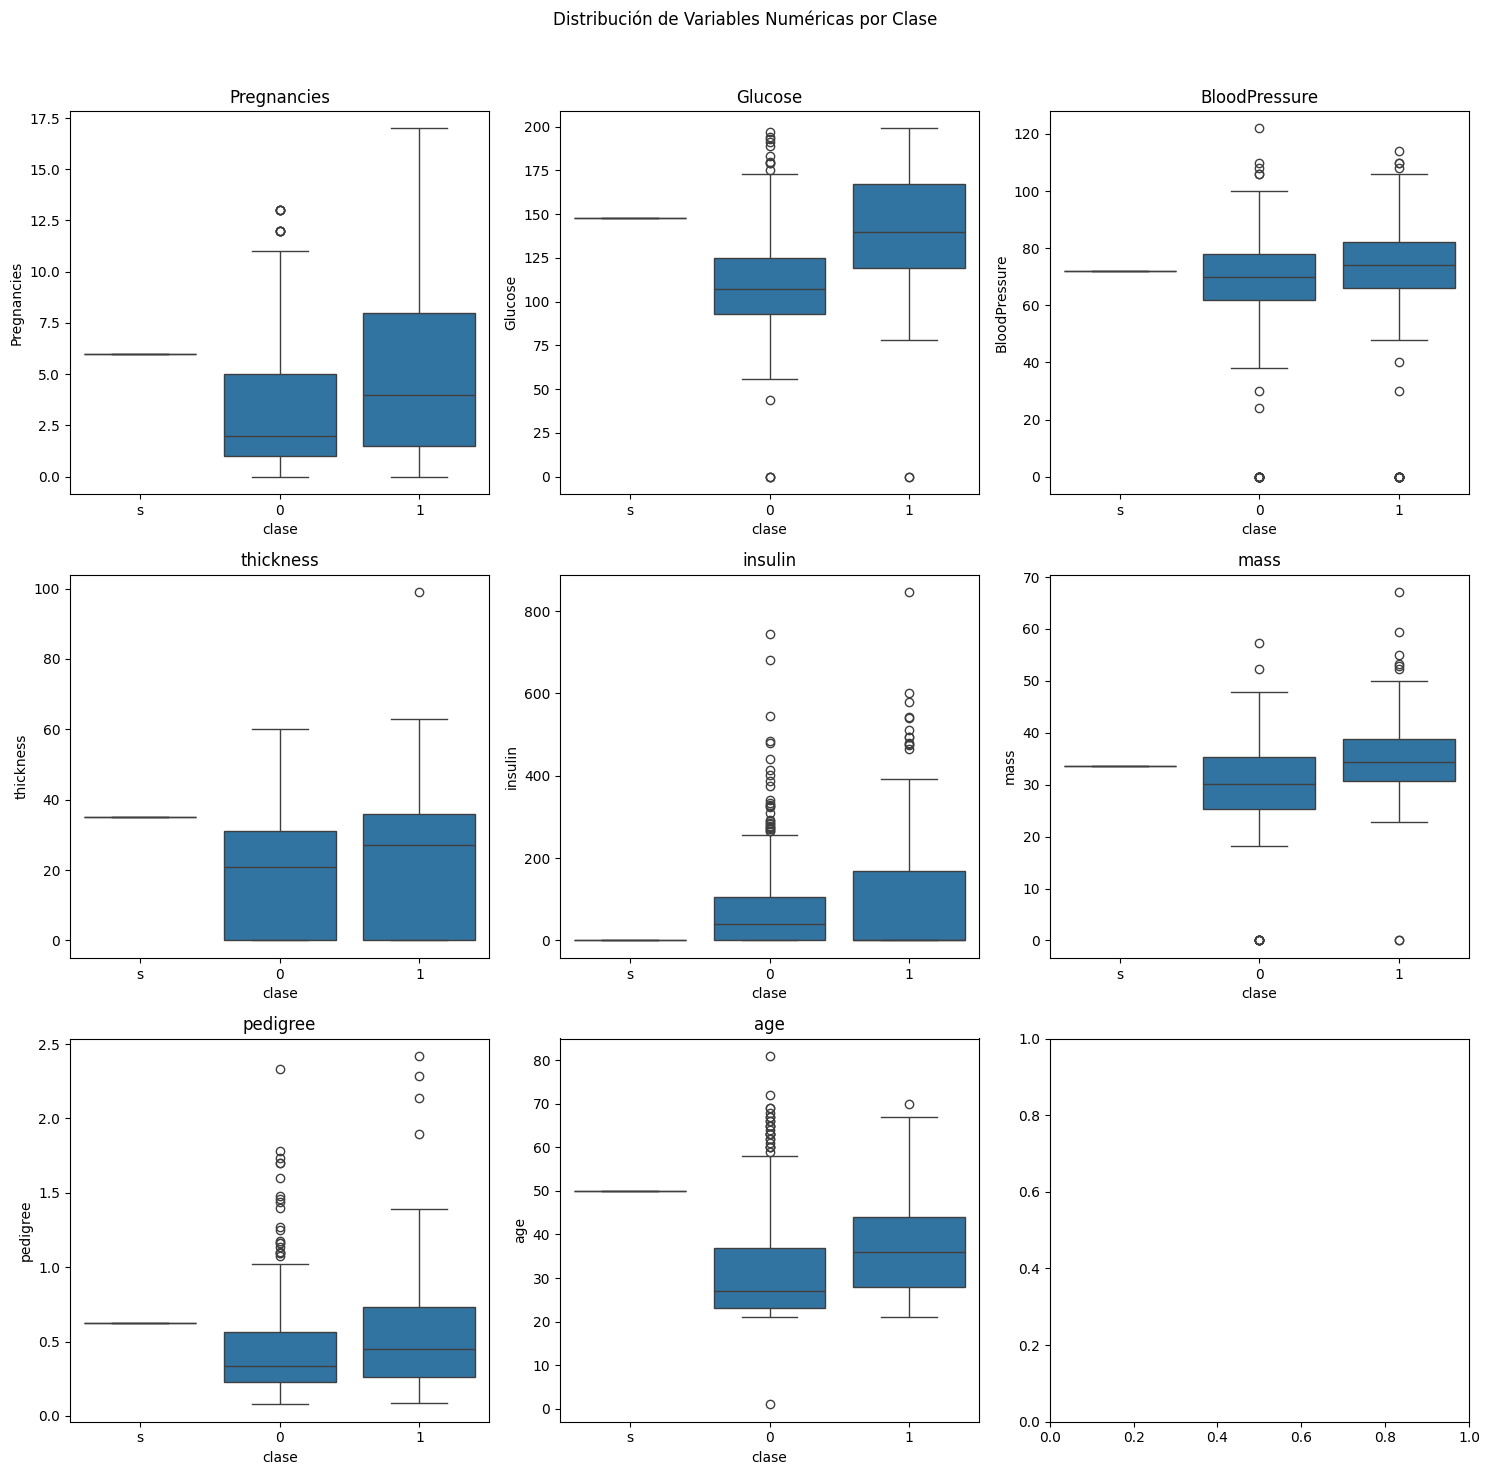

In [94]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Distribución de Variables Numéricas por Clase')

variables = db.columns[:-1] 
for var, ax in zip(variables, axes.flatten()):
    sns.boxplot(x='clase', y=var, data=db, ax=ax)
    ax.set_title(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


También podemos hallar la distribución de la edad

c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


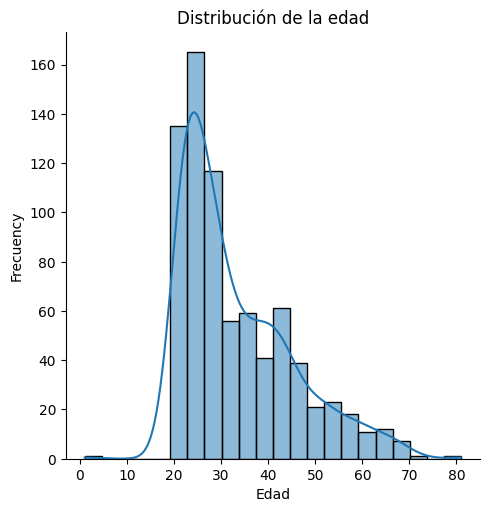

In [95]:
sns.displot(db['age'], kde = True)
plt.xlabel('Edad')
plt.ylabel('Frecuency')
plt.title('Distribución de la edad')
plt.show()

Podemos graficar la edad en función si tiene o no diabetes

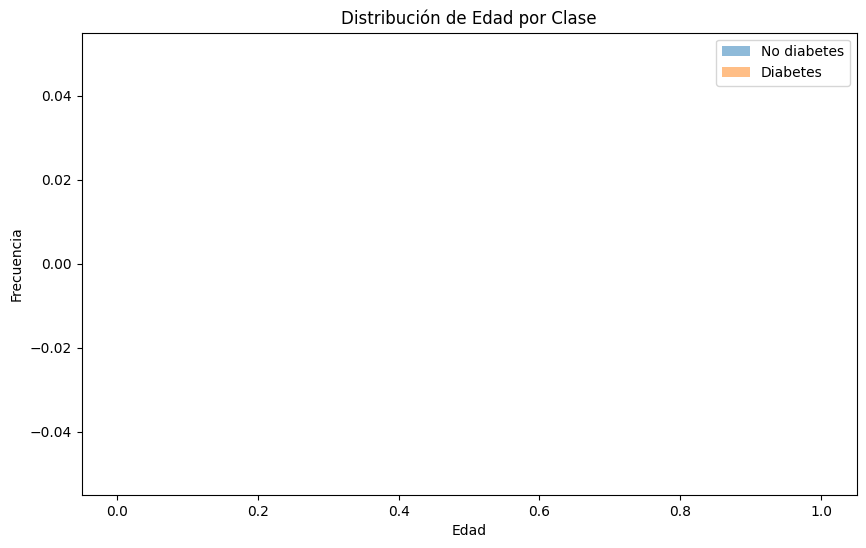

In [96]:
clase_0 = db[db['clase'] == 0]['age']
clase_1 = db[db['clase'] == 1]['age']

plt.figure(figsize=(10, 6))

plt.hist(clase_0, bins=10, alpha=0.5, label='No diabetes')
plt.hist(clase_1, bins=10, alpha=0.5, label='Diabetes')

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad por Clase')
plt.legend()

plt.show()

c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


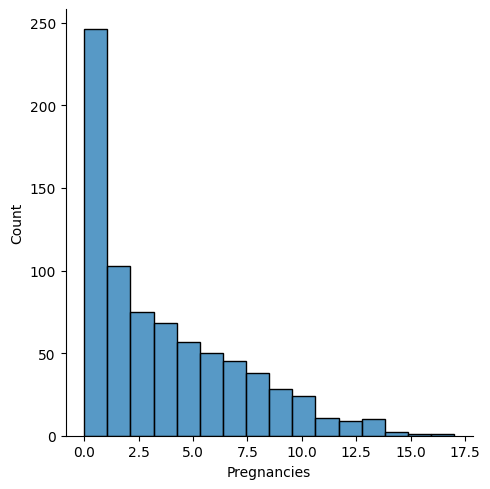

In [97]:
sns.displot(db['Pregnancies'])

## 5. 6. Analisis bivariado y multivariado

Creamos una matriz de correlación y posteriormete grficamos el mapa de calor

In [98]:

corr = db.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

ValueError: could not convert string to float: 's'

Podemos observar que hay una gran relación entre la edad y el número de embarazos


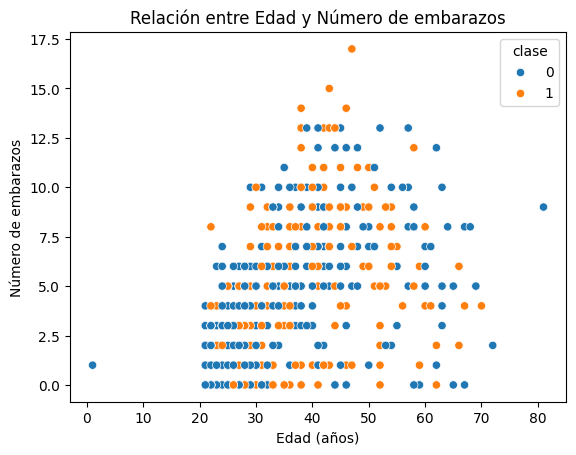

In [ ]:
sns.scatterplot(x='age', y='Pregnancies', hue='clase', data=db)
plt.title('Relación entre Edad y Número de embarazos')
plt.xlabel('Edad (años)')
plt.ylabel('Número de embarazos')
plt.show()

Con Scatter plot visualizamos una relación entre Edad y Concentración de Glucosa por Clase

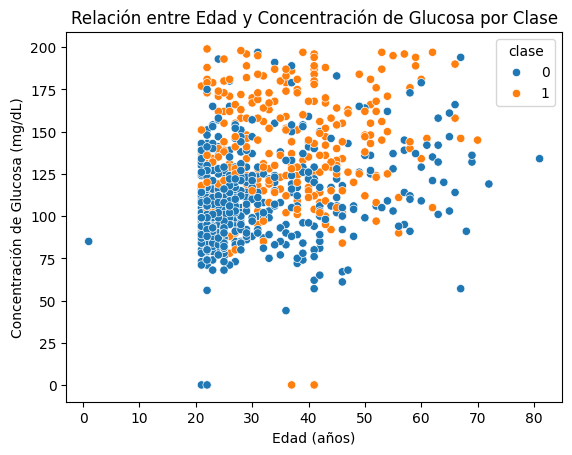

In [ ]:
sns.scatterplot(x='age', y='Glucose', hue='clase', data=db)
plt.title('Relación entre Edad y Concentración de Glucosa por Clase')
plt.xlabel('Edad (años)')
plt.ylabel('Concentración de Glucosa (mg/dL)')
plt.show()

Podemos visualizar la distribución pedigrí de diabetes por clase

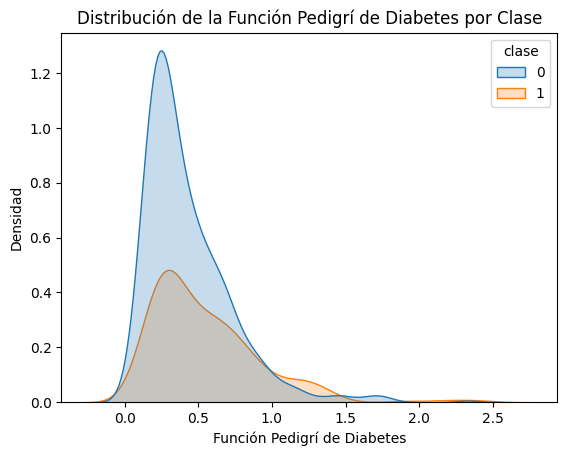

In [ ]:
sns.kdeplot(data=db, x='pedigree', hue='clase', fill=True)
plt.title('Distribución de la Función Pedigrí de Diabetes por Clase')
plt.xlabel('Función Pedigrí de Diabetes')
plt.ylabel('Densidad')
plt.show()

Podemos visualizar una amplia relación de la predispoción a obtener diabetes.

# 7. Para detectar posibles outliers podemos usar boxplots

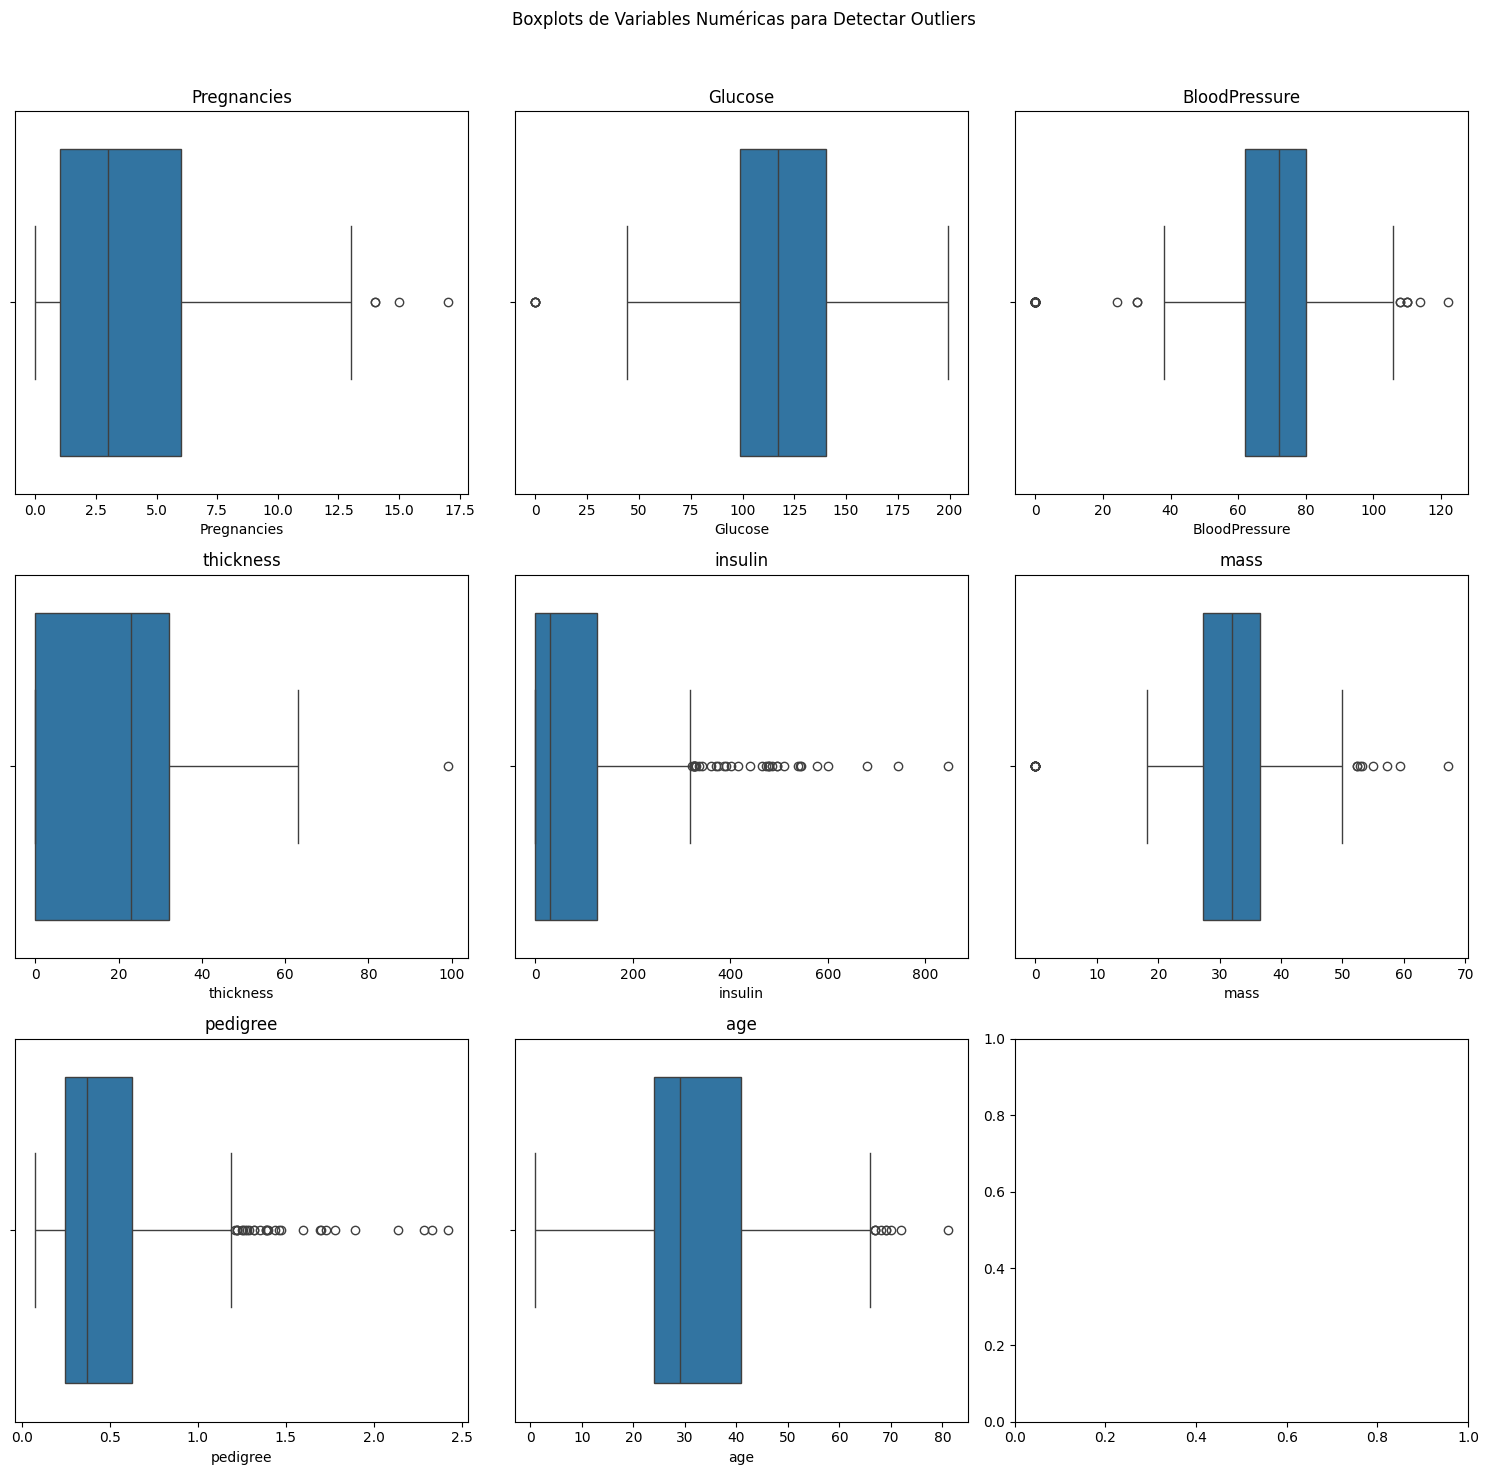

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Boxplots de Variables Numéricas para Detectar Outliers')

variables = db.columns[:-1]
for var, ax in zip(variables, axes.flatten()):
    sns.boxplot(x=db[var], ax=ax)
    ax.set_title(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()